In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [10]:
wine = load_wine()

In [11]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [12]:
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [18]:
# Understanding the features
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [14]:
# Get the names of the target classes
class_names = wine.target_names

# Display the names of the target classes
print(class_names)

['class_0' 'class_1' 'class_2']


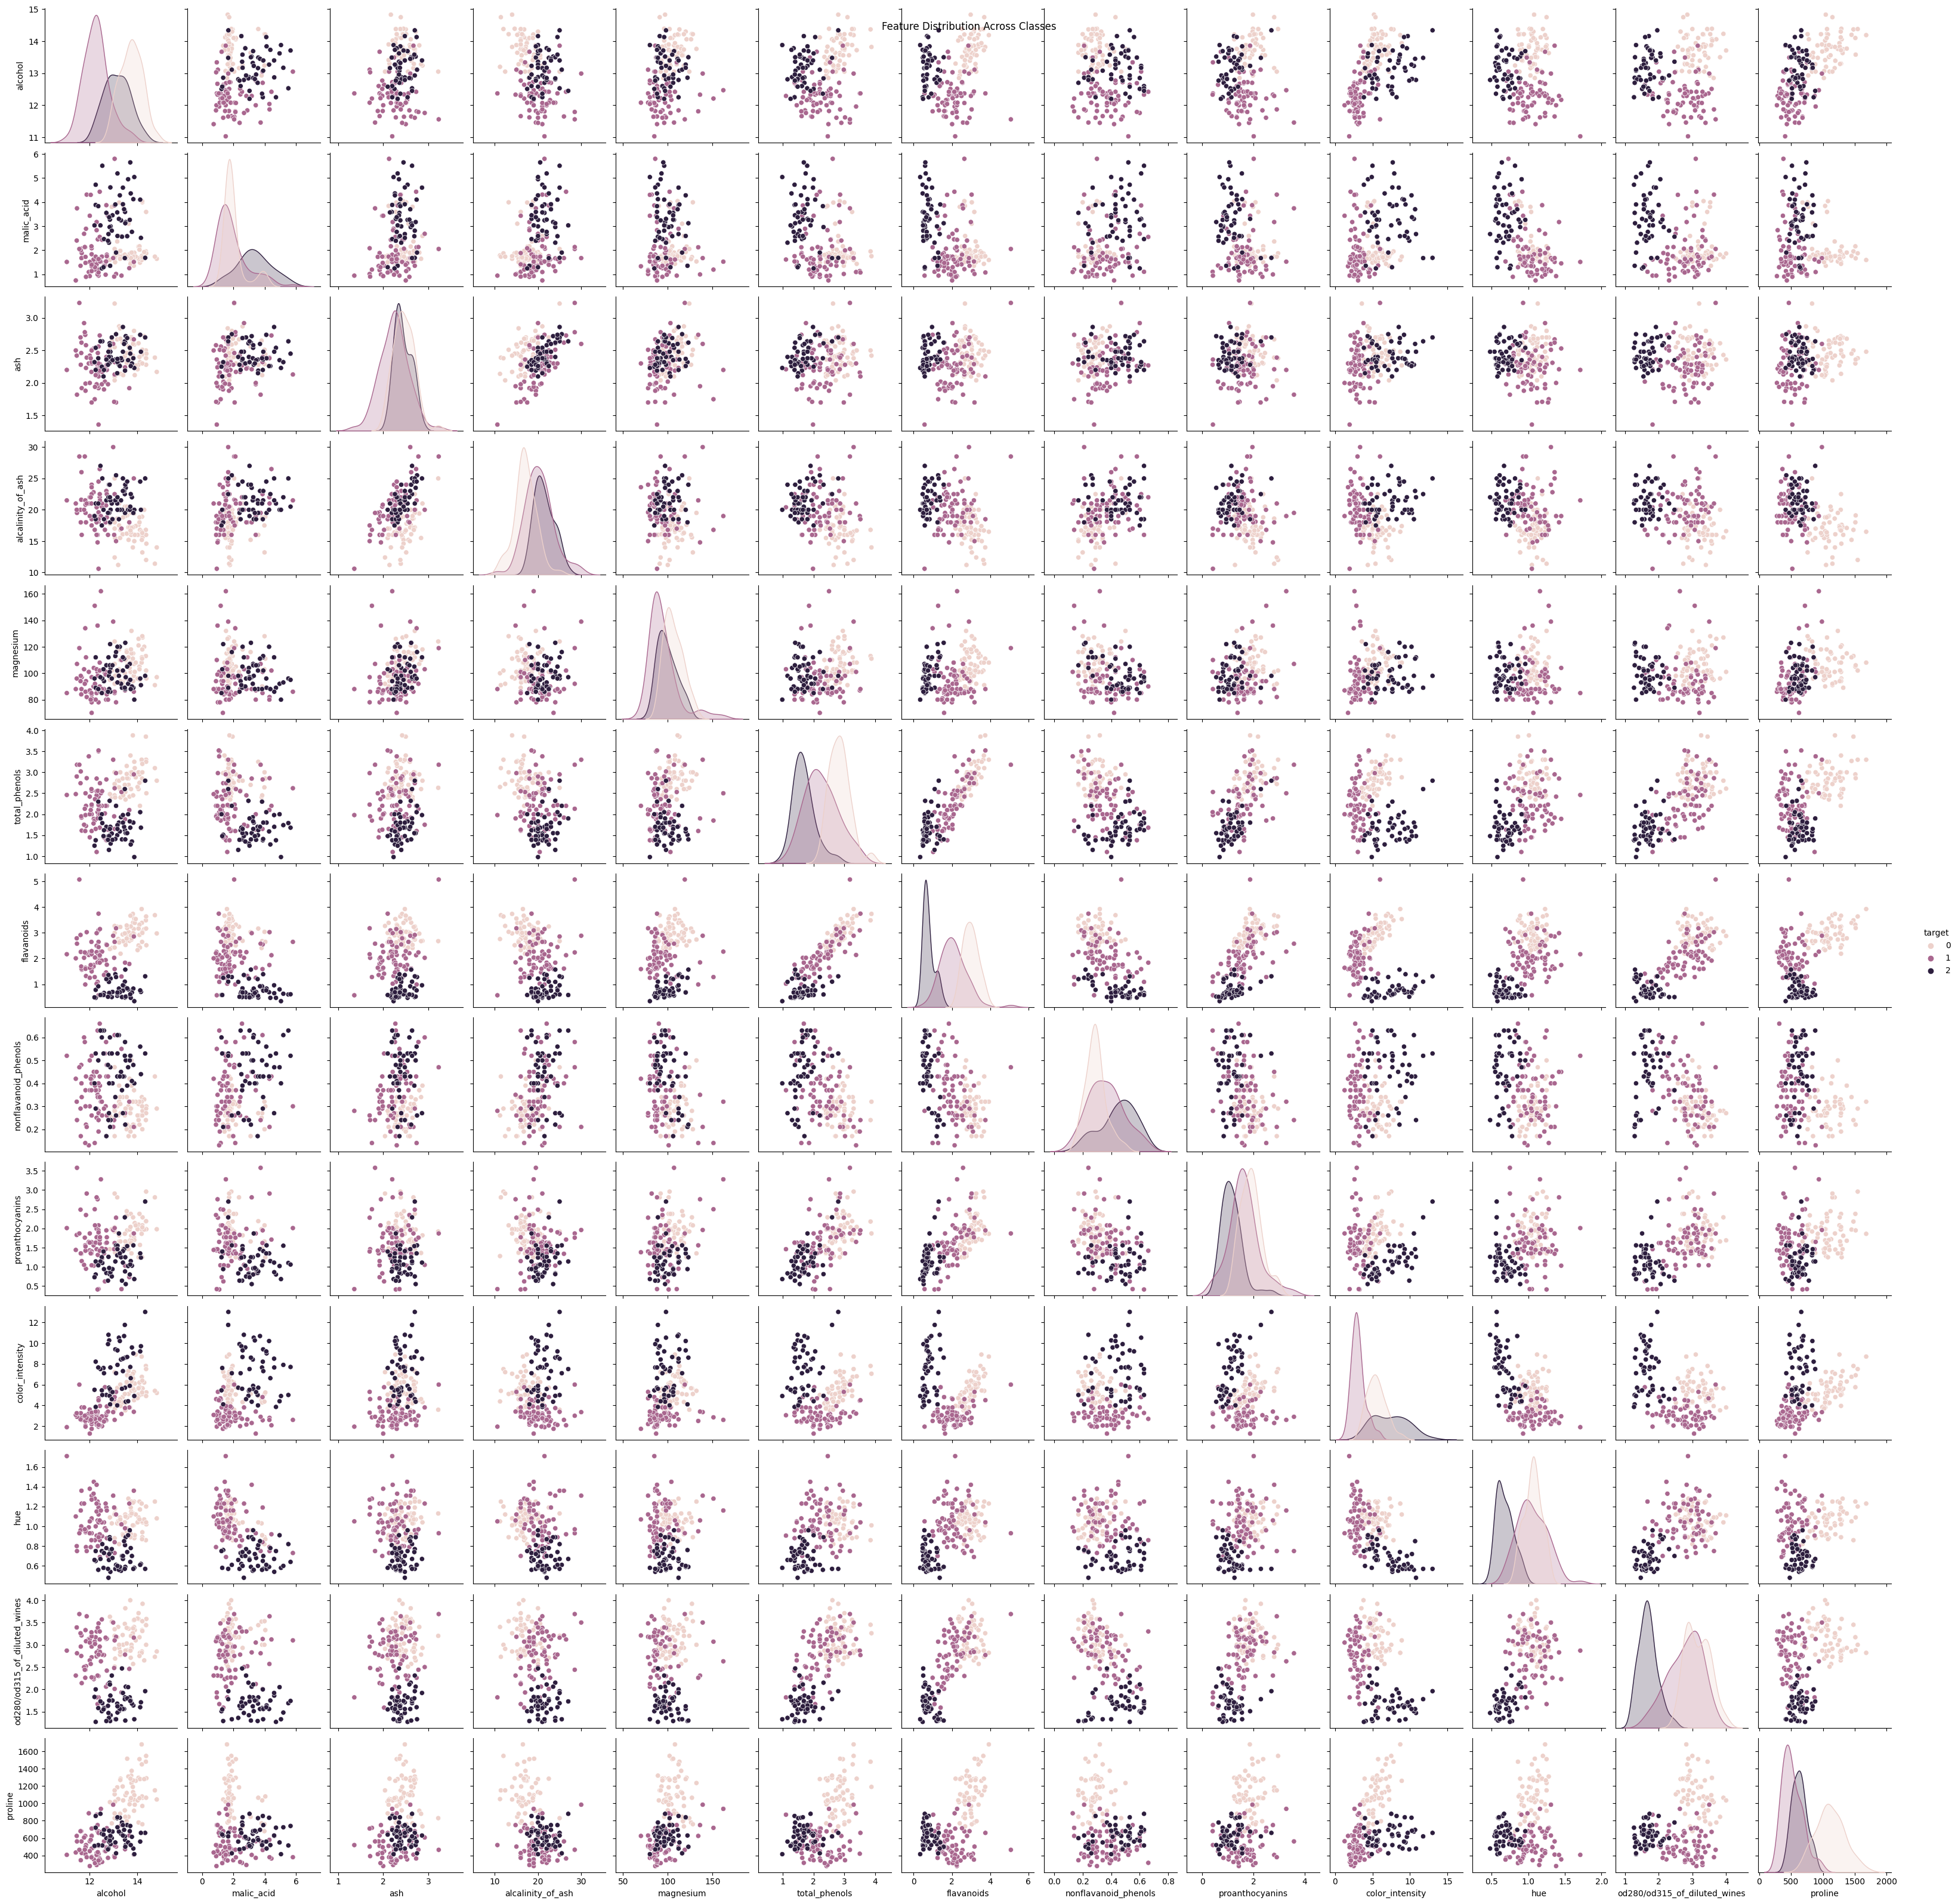

In [21]:
# 4. Feature Distribution Across Classes
sns.pairplot(wine_df, hue='target', diag_kind='kde')
plt.suptitle('Feature Distribution Across Classes')
plt.show()

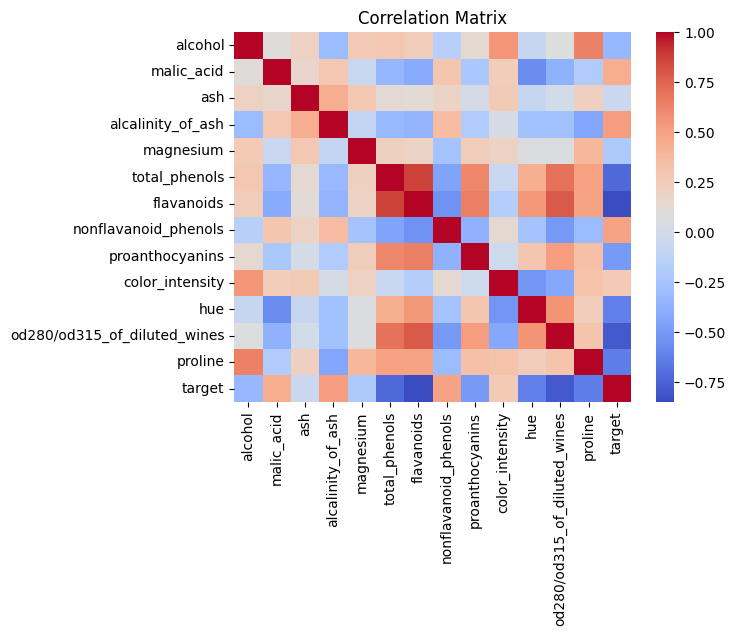

In [20]:
# 1. Correlation Analysis
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.features import Rank2D, PCA

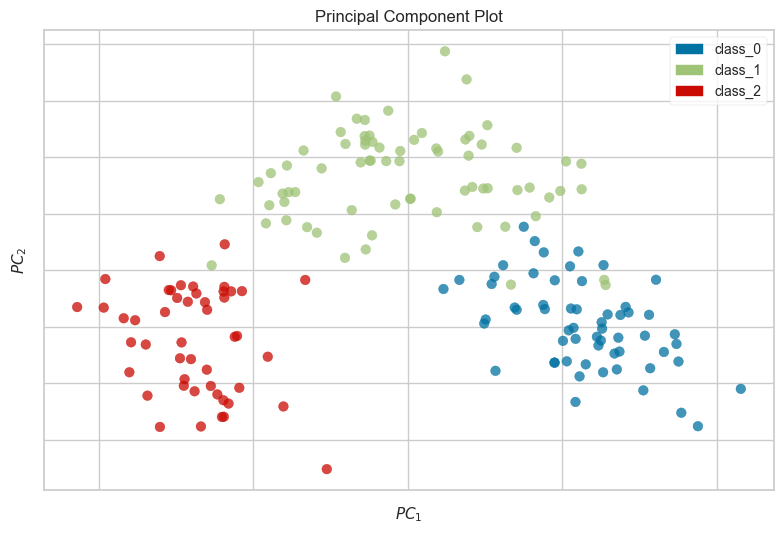

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [25]:
# 2. Principal Component Analysis (PCA)
X = wine_df.drop('target', axis=1)
y = wine_df['target']
visualizer = PCA(scale=True, classes=class_names)
visualizer.fit_transform(X, y)
visualizer.show()

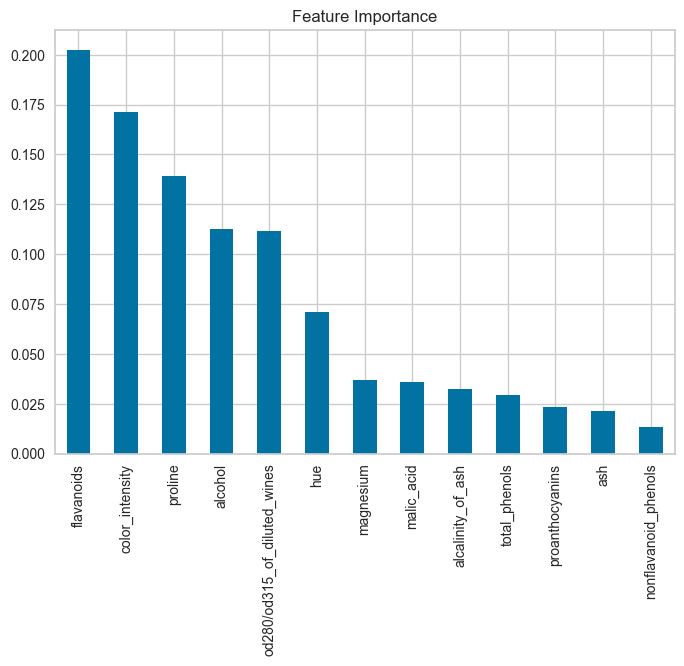

In [26]:
# 3. Feature Importance with Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [27]:
# 5. Machine Learning Model - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [28]:
# Model Evaluation
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Text(0.5, 1.0, 'Flavanoids Content by Wine Class')

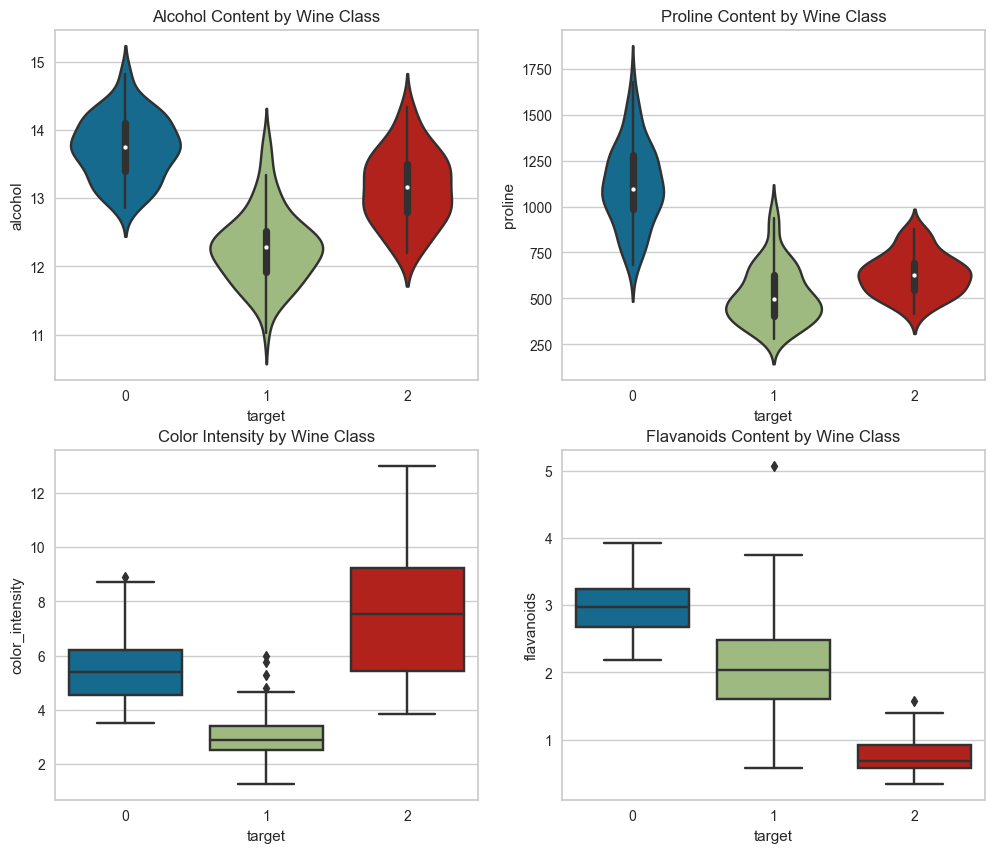

In [29]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Feature: Alcohol
sns.violinplot(x='target', y='alcohol', data=wine_df, ax=axes[0, 0])
axes[0, 0].set_title('Alcohol Content by Wine Class')

# Feature: Proline
sns.violinplot(x='target', y='proline', data=wine_df, ax=axes[0, 1])
axes[0, 1].set_title('Proline Content by Wine Class')

# Feature: Color Intensity
sns.boxplot(x='target', y='color_intensity', data=wine_df, ax=axes[1, 0])
axes[1, 0].set_title('Color Intensity by Wine Class')

# Feature: Flavanoids
sns.boxplot(x='target', y='flavanoids', data=wine_df, ax=axes[1, 1])
axes[1, 1].set_title('Flavanoids Content by Wine Class')